## Machine Learning Parcial 2
-  Antonio Jose Patiño Torres T00056470
-  Maria Angelica Becerra Pico T00054451

*UTB - 11/Oct/2021*

In [1]:
import io
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/centurion/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
raw = pd.read_csv("tweets_politica_kaggle.csv", sep="\t")

In [3]:
raw.head()

,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...


In [4]:
raw.info() # Aprox 10 cuentas tienen valores nulos (null) en campos tweet, partido, timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cuenta     130039 non-null  object 
 1   partido    130029 non-null  object 
 2   timestamp  130029 non-null  float64
 3   tweet      130029 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


In [5]:
nan_values = raw[raw.isna().any(axis=1)] # Culpables >:(
nan_values

,cuenta,partido,timestamp,tweet
130029,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130030,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130031,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130032,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130033,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130034,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130035,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130036,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130037,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130038,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN


In [6]:
raw = raw.drop(nan_values.index)

In [7]:
afiliaciones = raw.groupby("partido", as_index=False)['tweet'].count()
afiliaciones

,partido,tweet
0,ciudadanos,23552
1,podemos,24889
2,pp,26200
3,psoe,28882
4,vox,26506


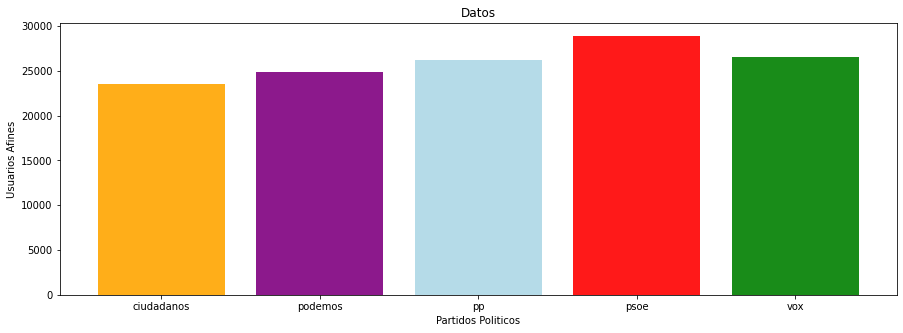

In [8]:
plt.figure(figsize=(15,5))
plt.bar(afiliaciones['partido'].values, afiliaciones['tweet'].values, color=["orange", "purple", "lightblue", "red", "green"], alpha=0.9)
plt.title('Datos')
plt.ylabel('Usuarios Afines', fontsize=10)
plt.xlabel('Partidos Politicos', fontsize=10)
plt.show()

In [9]:
afiliaciones.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   partido  5 non-null      object
 1   tweet    5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


In [10]:
train = raw.sample(frac=0.8)
test = raw.drop(train.index)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104023 entries, 43023 to 103487
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cuenta     104023 non-null  object 
 1   partido    104023 non-null  object 
 2   timestamp  104023 non-null  float64
 3   tweet      104023 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26006 entries, 0 to 130028
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cuenta     26006 non-null  object 
 1   partido    26006 non-null  object 
 2   timestamp  26006 non-null  float64
 3   tweet      26006 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1015.9+ KB


In [29]:
c = train["tweet"]
es_stops = set(stopwords.words('spanish'))
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=4000) #, stop_words=set(es_stops)) # to use bigrams ngram_range=(2,2)
bow = vectorizer.fit_transform(list(c)) # Bag of Words

In [30]:
list(c.head())

['"Lo peor que puede pasarles a los monárquicos es que solamente PP y VOX digan \'viva el rey\'".🗣️ @Pablo_Iglesias_ 📽️ Entrevista completa: https://t.co/9l2pSg16kk https://t.co/DjdI7z4pQt',
 '@elenita_tatus La foto refleja un instante.He visitado esa calle 6 veces el último mes, y nunca he visto a nadie. También tengo fotos. La propia asociación de vecinos dice que el uso es bajo. Esa calle además tiene problemas de seguridad pues no pueden acceder a ella los equipos de emergencias.',
 'New York Times. Opinión: Ciudadanos, o cómo hundirse sin estilo https://t.co/RBV8lGAYaW',
 '📽 @CarrizosaCarlos "Hay líderes del PP y del PSOE que rechazan la fórmula #MejorUnidos por cálculos electorales o por estar más cerca del independentismo" #ActualidadCs 🍊👉 Seguiremos insistiendo porque en circunstancias excepcionales se requieren soluciones excepcionales. https://t.co/9QF5KxWnVS',
 '@camino_mery 1.  Exigir no es negociar.2. Hay diferentes modelos de pacto. No uno único. 3. El problema, con los a

In [31]:
print(vectorizer.get_feature_names())

['00 en', '00 horas', '000 empleos', '000 euros', '000 millones', '000 personas', '10 años', '10 de', '100 000', '10n https', '11 de', '12 00', '12 00h', '19 00', '20 años', '24 horas', '25 de', '26 de', '28 de', '30 años', '30 de', '30 horas', '3quq6ixg6u https', '40 años', '70 de', 'abalosmeco en', 'abogacía del', 'acaba de', 'acabar con', 'acabo de', 'acceso la', 'acto de', 'acto en', 'actos de', 'actualidad política', 'actualidadcs https', 'acuerdo con', 'acuerdo de', 'acuerdo en', 'acuerdo para', 'acuerdos de', 'además de', 'adrilastra en', 'adrilastra https', 'afectadas por', 'afectados por', 'afrontar la', 'afrontar los', 'agenda 2030', 'agenda de', 'agenda para', 'agente de', 'agentes de', 'agentes sociales', 'agricultores ganaderos', 'ahora el', 'ahora en', 'ahora es', 'ahora la', 'ahora mismo', 'ahora que', 'ahora se', 'ahora toca', 'ahoraespaña https', 'ahorasí https', 'ahorasí votapsoe', 'ahoraunidad https', 'al año', 'al congreso', 'al de', 'al día', 'al estado', 'al final

In [32]:
bow

<104023x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 1030578 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [34]:
svm_lineal = svm.LinearSVC(C=1, max_iter=10000).fit(bow, train["partido"])

In [35]:
d = test["tweet"]
vectorizer2 = CountVectorizer(ngram_range=(2,2), max_features=4000,  vocabulary=vectorizer.get_feature_names()) # to use bigrams ngram_range=(2,2)
bow_test = vectorizer2.fit_transform(list(d)) # Bag of Words Test

In [36]:
acuracy_linear_svm = svm_lineal.score(bow_test, test["partido"]) #O(n^3)
print(acuracy_linear_svm)

0.5662923940629085


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", C = 10, max_iter=10000)
softmax.fit(bow, train["partido"]) # Mucho mejor running time que SVM

LogisticRegression(C=10, max_iter=10000, multi_class='multinomial')

In [39]:
acuracy_softmax = softmax.score(bow_test, test["partido"])
print(acuracy_softmax) # Inicialmente misma (muy parecida) accurracy que SMV

0.5617549796200877


In [103]:
# Primera iteracion:  SVM 0.5384911174344382       SoftMax 0.5396831500422979   500 features
# Segunda iteracion:  SVM 0.5461047450588326       SoftMax 0.5480658309620857   usando stop_words
# Tercera iteracion:  SVM 0.6062447127585942       SoftMax 0.6056294701222795   1000 features, stop_words
# Cuarta  iteracion:  SVM 0.6319695454895025       SoftMax 0.6320079981542721   1500 features, stop_words
#                     SVM 0.6882642467122971       SoftMax 0.6806506190879028   4000, features, stop_words

In [40]:
from sklearn.model_selection import cross_val_score
cross_smv = cross_val_score(svm_lineal, bow_test, test["partido"], scoring="f1_micro", cv=5)
cross_smv

array([0.4869281 , 0.4366468 , 0.40895982, 0.4635647 , 0.45875793])

In [41]:
cros_soft_max = cross_val_score(softmax, bow_test, test["partido"], scoring="f1_micro")
cros_soft_max

array([0.4686659 , 0.42491828, 0.39876947, 0.45298981, 0.4510671 ])

In [27]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(bow, train["partido"])

RandomForestClassifier()

In [28]:
acuracy_rand_forest = rand_forest.score(bow_test, test["partido"])
print(acuracy_rand_forest)

0.4620087672075675


In [ ]:
# naid bayes, random forest

# iteracion 1:         random forest 0.6257017611320465